In [6]:
from numpy import *
import matplotlib.pyplot as plt 
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import preprocessing
import pandas as pd

# Evaluation of Best Classification Model Using GridSearchCV

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Thesis Resources/dataset/NoSql_Injection/NoSqli_Dataset.csv")
df.head()

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,ClassLabel
0,0,0,0,1,1,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [8]:

X = df.drop(['ClassLabel'],axis='columns')
Y = df['ClassLabel']

In [9]:
Y.value_counts()

0    801
1    203
Name: ClassLabel, dtype: int64

In [10]:
X.head(2)

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9
0,0,0,0,1,1,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0


In [11]:
Y.head(5)

0    0
1    1
2    0
3    0
4    0
Name: ClassLabel, dtype: int64

In [12]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly']
        }  
    },
    'decision_tree': {
        'model': tree.DecisionTreeClassifier(),
        'params' : {
            'criterion':["gini","entropy"],
            'max_depth':[1,2,3,4,5,6,7,None]
        }
    },
    'Adaboost':{
        'model':AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)),
        'params':{
              'base_estimator__criterion' : ["gini", "entropy"],
              'base_estimator__splitter' :   ["best", "random"],
              'n_estimators': [1, 2]
             }
    },

    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Naive_Bayes:BernoulliNB':{
        'model':BernoulliNB(),
        'params':{
            'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
        }
    },


}

In [13]:
scores = []

target_names = ['Not Malicious', 'Malicious']

ConfusionMatrix={}
for model_name, mp in model_params.items():
    grid =  GridSearchCV(mp['model'],param_grid= mp['params'], cv=5, return_train_score=False,n_jobs=-1)
    grid.fit(X, Y)
    y_pred=grid.best_estimator_.predict(X)
    print('-------------------------------------------')
    print(model_name.upper())  
    print('-------------------------------------------')
    print(classification_report(Y, y_pred, target_names=target_names))
    ConfusionMatrix[model_name]=confusion_matrix(Y, y_pred)
    scores.append({
        'model': model_name.upper(),
        'best_score': grid.best_score_,
        'best_params': grid.best_params_,
        
    
    })


    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

-------------------------------------------
SVM
-------------------------------------------
               precision    recall  f1-score   support

Not Malicious       0.93      0.99      0.96       801
    Malicious       0.97      0.72      0.82       203

     accuracy                           0.94      1004
    macro avg       0.95      0.86      0.89      1004
 weighted avg       0.94      0.94      0.93      1004

-------------------------------------------
DECISION_TREE
-------------------------------------------
               precision    recall  f1-score   support

Not Malicious       0.94      1.00      0.97       801
    Malicious       0.97      0.75      0.85       203

     accuracy                           0.95      1004
    macro avg       0.96      0.87      0.91      1004
 weighted avg       0.95      0.95      0.94      1004

-------------------------------------------
ADABOOST
-------------------------------------------
               precision    recall  f1-scor

,model,best_score,best_params
0,SVM,0.918343,"{'C': 20, 'kernel': 'poly'}"
1,DECISION_TREE,0.914358,"{'criterion': 'entropy', 'max_depth': None}"
2,ADABOOST,0.915353,"{'base_estimator__criterion': 'gini', 'base_es..."
3,RANDOM_FOREST,0.917343,{'n_estimators': 5}
4,LOGISTIC_REGRESSION,0.904398,{'C': 1}
5,NAIVE_BAYES:BERNOULLINB,0.878517,{'alpha': 1.0}


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


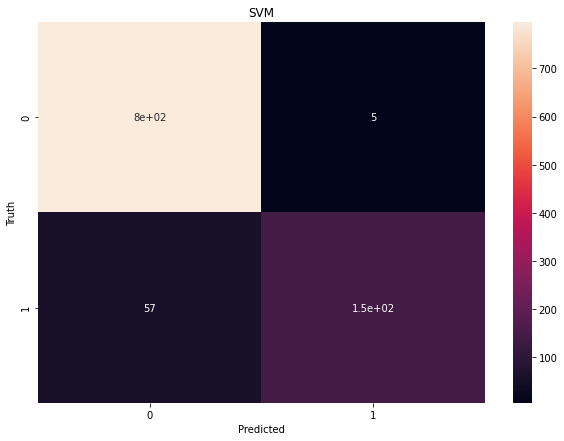

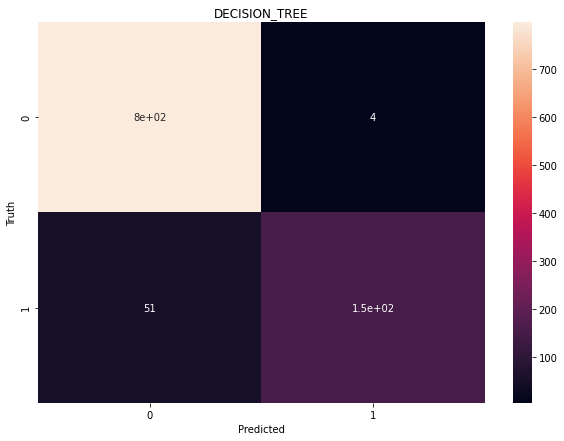

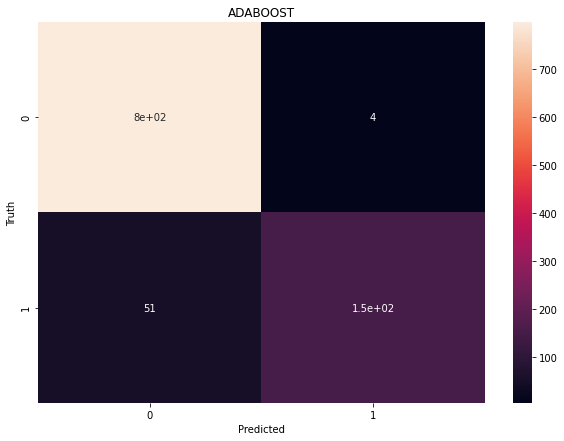

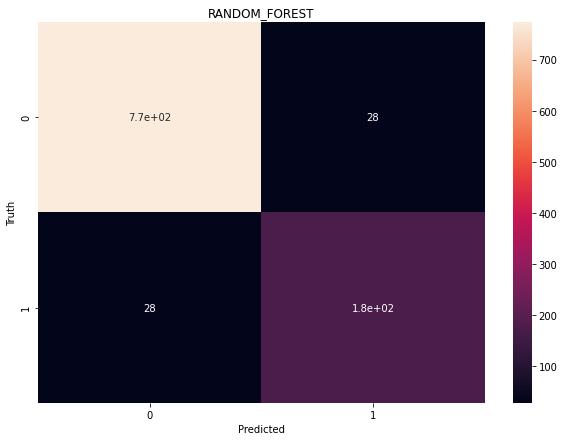

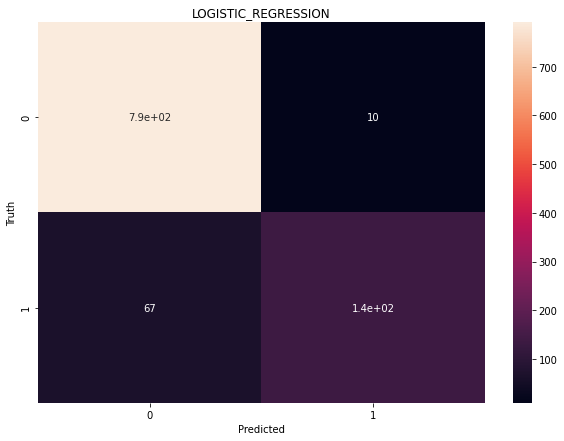

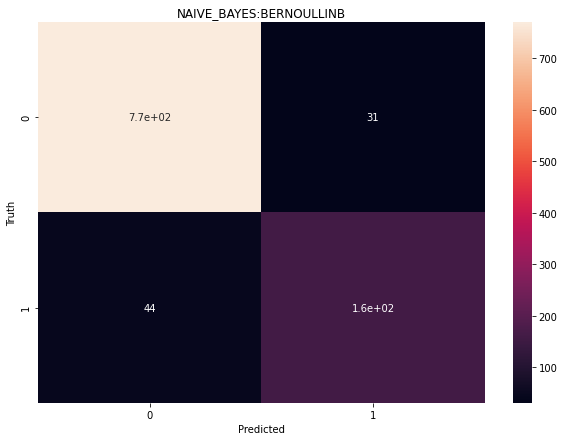

In [15]:
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt

#Confusion matrix of best classification results of the models
for model_name,matrix in ConfusionMatrix.items():
    #print(model_name)
    plt.figure(figsize = (10,7))
    sn.heatmap(matrix, annot=True)
    plt.title(model_name.upper())
    plt.xlabel('Predicted')
    plt.ylabel('Truth')


# TPOT for Automated Machine Learning

##### Reference


*   https://machinelearningmastery.com/tpot-for-automated-machine-learning-in-python/



In [16]:
pip install tpot

     |████████████████████████████████| 92kB 5.5MB/s 
     |████████████████████████████████| 163kB 12.7MB/s 
     |████████████████████████████████| 157.5MB 71kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=d0e42b70ef15443458d7548f575103522dcb8c2678cab650107ba2bb77bc794f
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [17]:
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.7


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [18]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [19]:
# define search
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)

In [21]:
# perform the search
model.fit(X, Y)
# export the best model
model.export('tpot_sonar_best_model.py')


Generation 1 - Current best internal CV score: 0.9352541254125413

Generation 2 - Current best internal CV score: 0.9379141914191421

Generation 3 - Current best internal CV score: 0.9385841584158416

Generation 4 - Current best internal CV score: 0.941894389438944

Generation 5 - Current best internal CV score: 0.941894389438944

Best pipeline: GaussianNB(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False))
